To validate some different RL algorithms the original FrozenLake-v0 environment is used. FrozenLake-v0 is considered solved when the agent obtains an average reward of at least $0.78$ over $100$ consecutive episodes.

### Parameters

In [11]:
import numpy as np
import gym
import random

%matplotlib inline

%run ../visualization_and_metrics.py

env = gym.make('FrozenLake-v0')
env = env.unwrapped

### Value Iteration

In [12]:
%run ../value_iteration.py

gamma = 1

v = value_iteration(env, gamma, 100000, 1e-20)
print(v)
policy = extract_policy(env, v, gamma)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))

Converged at 1372
[0.82352941 0.82352941 0.82352941 0.82352941 0.82352941 0.
 0.52941176 0.         0.82352941 0.82352941 0.76470588 0.
 0.         0.88235294 0.94117647 0.        ]
LUUU
LHLH
UDLH
HRDH
Average reward over 100 episodes : 0.85


### Policy Iteration

In [13]:
%run ../policy_iteration.py

gamma = 1

policy = policy_iteration(env, gamma, 100000, 1e-20)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))

Converged at 3
LUUU
LHLH
UDLH
HRDH
Average reward over 100 episodes : 0.85


### Q-Learning

[0.79923988 0.68372401 0.5817225  0.26749147 0.79919671 0.
 0.4251976  0.         0.80454931 0.8270055  0.80687686 0.
 0.         0.88190075 0.93849144 0.        ]
LULU
LHLH
UDLH
HRDH


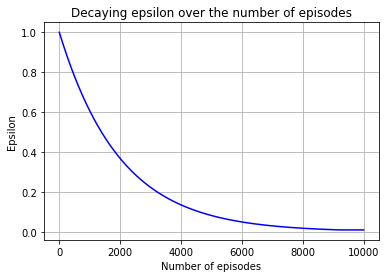

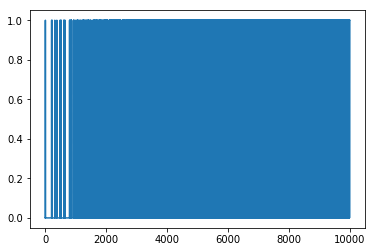

In [30]:
%run ../q_learning.py

alpha, gamma = 0.05, 1
nb_episodes, nb_steps = 10000, 100
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.9995

q_table, rList = q_learning(env, alpha, gamma, nb_episodes, nb_steps, epsilon, epsilon_min, epsilon_decay)
v = q_to_v(env, q_table)
print(v)
policy = extract_policy(env, v, gamma)
visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
visualize_policy_FL(policy)
#print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))
plt.plot(rList)

### Deep-Q-Learning

In [ ]:
%run ../deep_q_learning_tf.py

alpha = 0.05, 1
nb_episodes, nb_steps = 4000, 100
epsilon, epsilon_min, epsilon_decay = 1, 0.01, 0.9995

visualizing_epsilon_decay(nb_episodes, epsilon, epsilon_min, epsilon_decay)
q_table, rList = dql(env, gamma, nb_episodes, nb_steps, epsilon, epsilon_min, epsilon_decay)
policy = q_to_policy_FL(q_table)
visualize_policy_FL(policy)
print("Average reward over 100 episodes : "+str(average_n_episodes(env, policy, 100)))
plt.plot(rList)